<a href="https://colab.research.google.com/github/geojojacob/ML_Group_Assignment2/blob/master/UTS_ML_Assignment2_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

Installing packages

In [7]:

install.packages(c("ROAuth","plyr","stringr","ggplot2","tm","twitteR","ROAuth","RCurl","wordcloud"), dependencies = TRUE)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“dependencies ‘Rcampdf’, ‘Rgraphviz’, ‘tm.lexicon.GeneralInquirer’, ‘Rcompression’ are not available”also installing the dependencies ‘units’, ‘blob’, ‘rgeos’, ‘sf’, ‘pdftools’, ‘Rpoppler’, ‘RSQLite’, ‘RMySQL’, ‘XML’

Warning message in install.packages(c("ROAuth", "plyr", "stringr", "ggplot2", "tm", :
“installation of package ‘units’ had non-zero exit status”Warning message in install.packages(c("ROAuth", "plyr", "stringr", "ggplot2", "tm", :
“installation of package ‘rgeos’ had non-zero exit status”Warning message in install.packages(c("ROAuth", "plyr", "stringr", "ggplot2", "tm", :
“installation of package ‘pdftools’ had non-zero exit status”Warning message in install.packages(c("ROAuth", "plyr", "stringr", "ggplot2", "tm", :
“installation of package ‘Rpoppler’ had non-zero exit status”Warning message in install.packages(c("ROAuth", "plyr", "stringr", "ggplot2", "tm", :
“installation 

Import Libraries

In [0]:
library(twitteR)
library(ROAuth)
library(plyr)
library(stringr)
library(ggplot2)
library(RCurl)
library(RColorBrewer)
library(tm)
library(wordcloud)

Connecting to twitter

In [9]:

options(RCurlOptions = list(cainfo = system.file("CurlSSL", "cacert.pem", package = "RCurl")))


#save these credentials and register

download.file(url= "http://curl.haxx.se/ca/cacert.pem", destfile= "cacert.pem")
credentials <- OAuthFactory$new(consumerKey='tpeVWtDW1z8lpX7OsJ5UOQFTn',
                                consumerSecret='4TD4aCVV0xQR4b4NjkaFVd4JzIkuRHAMnm1KmDyENooaiz651u',
                                requestURL='https://api.twitter.com/oauth/request_token',
                                accessURL='https://api.twitter.com/oauth/access_token',
                                authURL='https://api.twitter.com/oauth/authorize')

credentials$handshake(cainfo="cacert.pem")

save(credentials, file="twitter authentication.Rdata")

load("twitter authentication.Rdata")

setup_twitter_oauth(credentials$consumerKey, credentials$consumerSecret, 
                    credentials$oauthKey, credentials$oauthSecret)


To enable the connection, please direct your web browser to: 
https://api.twitter.com/oauth/authorize?oauth_token=IAP7kgAAAAABAHzBAAABbWdzqEQ
When complete, record the PIN given to you and provide it here: 3006716
[1] "Using direct authentication"


In [0]:

iphone11.list <- searchTwitter('#IPhone11', n=2000)
iphone11.df <- twListToDF(iphone11.list)
write.csv(iphone11.df, file='iphone11.csv', row.names =F)




In [0]:
# calculating sentiment score

score_sentiment = function(sentences, positive_words, negative_words, .progress='none')
{
  require(plyr)
  require(stringr)
  
  scores = laply(sentences, function(sentence, positive_words, negative_words)
  {
    sentence = gsub('[[:punct:]]', '', sentence)
    sentence = gsub('[[:cntrl:]]', '', sentence)
    sentence = gsub('\\d+', '', sentence)
    
    sentence = tolower(sentence)
    word.list = str_split(sentence, '\\s+')
    words = unlist(word.list)
    
    positive_matches = match(words, positive_words)
    negative_matches = match(words, negative_words)
    
    positive_matches = !is.na(positive_matches)
    negative_matches = !is.na(negative_matches)
    
    score = sum(positive_matches) - sum(negative_matches)
    return(score)    
  }, positive_words, negative_words, .progress=.progress)
  scores.df = data.frame(score = scores, text = sentences)
  return(scores.df)
}

In [16]:

#load word lists
positive_words = scan ('positive-words.txt', what = 'character', comment.char =';')
negative_words = scan ('negative-words.txt', what = 'character', comment.char =';')

#import csv file
datasetiphone11 <- read.csv('iphone11.csv')
datasetiphone11$text <-as.factor(datasetiphone11$text) 


#calculating scores

DataS.scores = score_sentiment(datasetiphone11$text, positive_words, negative_words, .progress='text')

# write.csv(DataS.scores, file = paste(path,"iphone11score.csv",sep =""), row.names = TRUE)
write.csv(DataS.scores, file='iphone11score.csv',sep ="", row.names = TRUE)








  |======================================================================| 100%


Warning message in write.csv(DataS.scores, file = "iphone11score.csv", sep = "", :
“attempt to set 'sep' ignored”

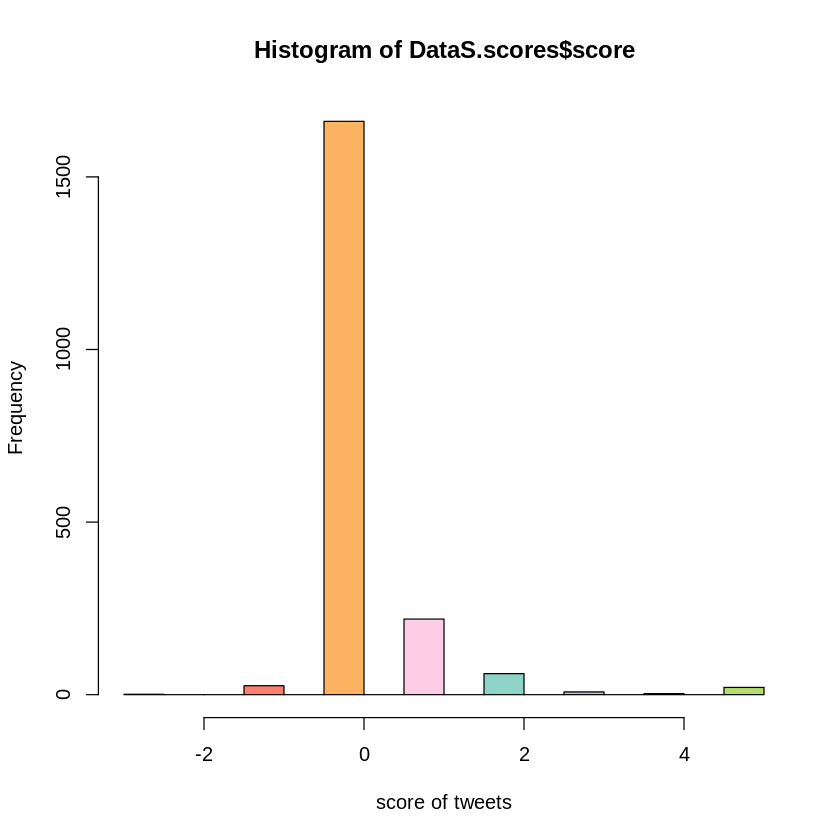

In [17]:
hist(DataS.scores$score, xlab='score of tweets', col=brewer.pal(9,'Set3'))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


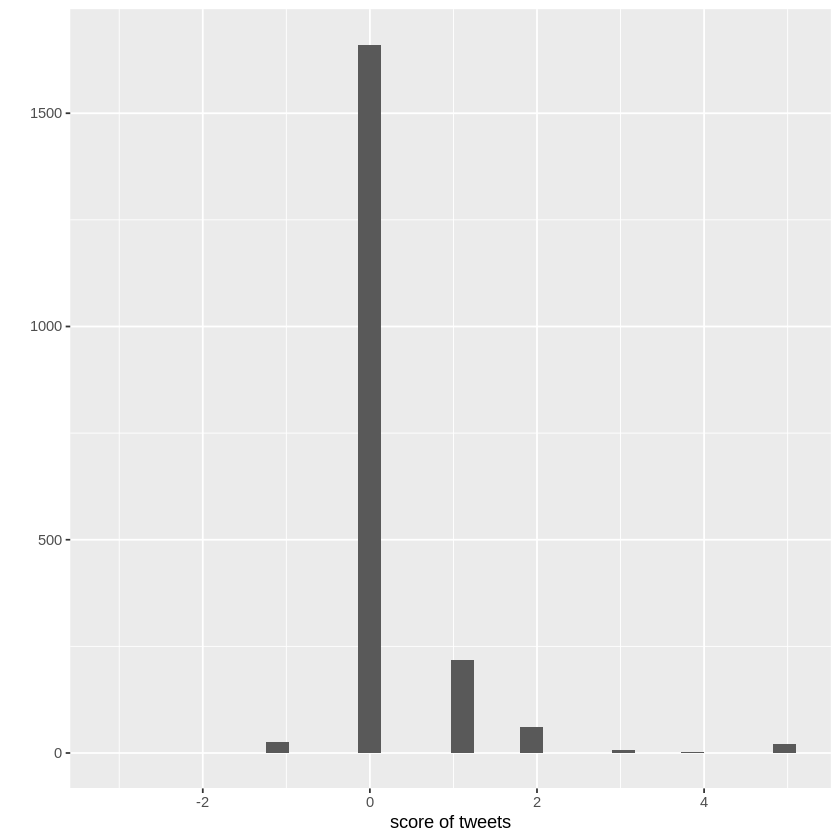

In [18]:
qplot(DataS.scores$score, xlab='score of tweets')

In [0]:



rwctweets <- searchTwitter('#iphone11', n=2000, lang="en")


In [0]:
Textprocessing <- function(x)
  
{gsub("http[[:alnum:]]*",'', x)
  gsub('http\\S+\\s*', '', x) ## Remove URLs
  
  gsub('\\b+RT', '', x) ## Remove RT
  gsub('#\\S+', '', x) ## Remove Hashtags
  
  gsub('@\\S+', '', x) ## Remove Mentions
  gsub('[[:cntrl:]]', '', x) ## Remove Controls and special characters
  
  gsub("\\d", '', x) ## Remove Controls and special characters
  
  gsub('[[:punct:]]', '', x) ## Remove Punctuations
  
  gsub("^[[:space:]]*","",x) ## Remove leading whitespaces
  
  gsub("[[:space:]]*$","",x) ## Remove trailing whitespaces
  
  gsub(' +',' ',x) ## Remove extra whitespaces
}

In [0]:


tweets.df <- do.call("rbind", lapply(rwctweets,as.data.frame))
tweets.df$text <- sapply(tweets.df$text,function(row) iconv(row, "latin1", "ASCII", sub="")) #remove emoticon
tweets.df$text = gsub("(f|ht)tp(s?)://(.*)[.][a-z]+", "", tweets.df$text) #remove URL
tweets.df <- gsub("http.","",tweets.df$text)
tweets.df <- gsub("https.","",tweets.df)
tweets.df <- gsub("@.","",tweets.df)
tweets.df <- gsub("#.","",tweets.df)




In [26]:


#tweets.df <- twListToDF(rwctweets_v)
myCorpus <- Corpus(VectorSource(tweets.df))

myCorpus <- tm_map(myCorpus, function(x) iconv(enc2utf8(x), sub = "byte"))

myCorpus <- tm_map(myCorpus, content_transformer(tolower))

myCorpus <- tm_map(myCorpus, removePunctuation)

myCorpus <- tm_map(myCorpus, removeNumbers)


myCorpus <- tm_map(myCorpus,Textprocessing)


myCorpus <- tm_map(myCorpus, stripWhitespace)

mystopwords <- c(stopwords("english"),"rt","íí","get","like","just","yes","know","will","good","day","people")

myCorpus <- tm_map(myCorpus,removeWords,mystopwords)


myCorpus_copy <- myCorpus
                   
#rwctweets_text = sapply(rwctweets, function(x) x$getText())
#rwctweets_corpus = Corpus(VectorSource(rwctweets_text))

Warning message in tm_map.SimpleCorpus(myCorpus, function(x) iconv(enc2utf8(x), :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, Textprocessing):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, stripWhitespace):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
“transformation drops documents”

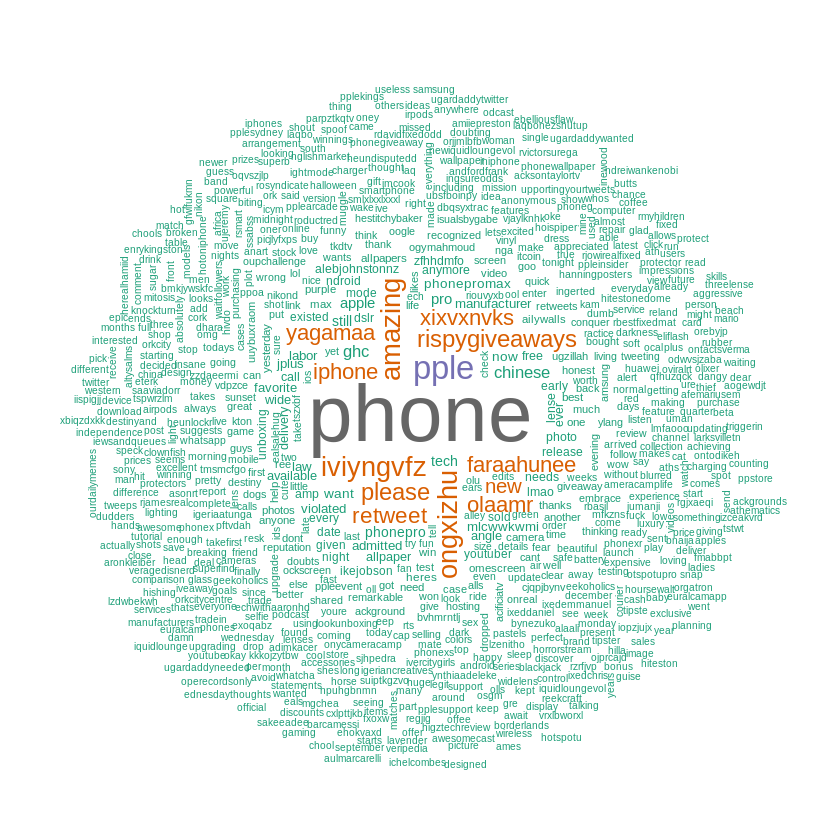

In [28]:

tdm = TermDocumentMatrix(
  myCorpus_copy,
  control = list(
    removePunctuation = TRUE,
    stopwords = c("iphone11", "iphone11", stopwords("english")),
    removeNumbers = TRUE, tolower = TRUE)
)

m = as.matrix(tdm)
# get word counts in decreasing order
word_freqs = sort(rowSums(m), decreasing = TRUE) 
# create a data frame with words and their frequencies
dm = data.frame(word = names(word_freqs), freq = word_freqs)

wordcloud(dm$word, dm$freq, random.order = FALSE, colors = brewer.pal(8, "Dark2"))